 Task:
 Text generation or conditional text generation, specifically training a model to generate solution steps and answers based on input question descriptions.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')   # connect to gdrive

# Change working directory to be current folder
import os
os.chdir('/content/gdrive/My Drive/Practice/4/ml-arxiv-papers/original_datasets')


Mounted at /content/gdrive


#dataset ml-arxiv-papers

This is a dataset containing ML ArXiv papers.
https://huggingface.co/datasets/aalksii/ml-arxiv-papers

In [2]:
#查看训练集数据分布

import pandas as pd

# 设置 pandas 的显示选项，使其不进行内容省略
pd.set_option('display.max_colwidth', None)  # 设置列宽为 None，以完整显示每列的内容

# 加载 Parquet 文件
df = pd.read_parquet('./train.parquet')

# 查看 DataFrame 的形状
print("DataFrame 的形状：", df.shape)

# 仅显示前几行，但每行内容完整显示
display(df.head())


DataFrame 的形状： (105832, 2)


,title,abstract
0,"Expected Frequency Matrices of Elections: Computation, Geometry, and Preference Learning","We use the ""map of elections"" approach of Szufa et al. (AAMAS 2020) to analyze several well-known vote distributions. For each of them, we give an explicit formula or an efficient algorithm for computing its frequency matrix, which captures the probability that a given candidate appears in a given position in a sampled vote. We use these matrices to draw the ""skeleton map"" of distributions, evaluate its robustness, and analyze its properties. We further use them to identify the nature of several real-world elections."
1,Deep Normed Embeddings for Patient Representation,"We introduce a novel contrastive representation learning objective and a training scheme for clinical time series. Specifically, we project high dimensional E.H.R. data to a closed unit ball of low dimension, encoding geometric priors so that the origin represents an idealized perfect health state and the euclidean norm is associated with the patient's mortality risk. Moreover, using septic patients as an example, we show how we could learn to associate the angle between two vectors with the different organ system failures, thereby, learning a compact representation which is indicative of both mortality risk and specific organ failure. We show how the learned embedding can be used for online patient monitoring, supplement clinicians and improve performance of downstream machine learning tasks. This work was partially motivated from the desire and the need to introduce a systematic way of defining intermediate rewards for Reinforcement Learning in critical care medicine. Hence, we also show how such a design in terms of the learned embedding can result in qualitatively different policies and value distributions, as compared with using only terminal rewards."
2,An Efficient Mixture of Deep and Machine Learning Models for COVID-19 and Tuberculosis Detection Using X-Ray Images in Resource Limited Settings,"Clinicians in the frontline need to assess quickly whether a patient with symptoms indeed has COVID-19 or not. The difficulty of this task is exacerbated in low resource settings that may not have access to biotechnology tests. Furthermore, Tuberculosis (TB) remains a major health problem in several low- and middle-income countries and its common symptoms include fever, cough and tiredness, similarly to COVID-19. In order to help in the detection of COVID-19, we propose the extraction of deep features (DF) from chest X-ray images, a technology available in most hospitals, and their subsequent classification using machine learning methods that do not require large computational resources. We compiled a five-class dataset of X-ray chest images including a balanced number of COVID-19, viral pneumonia, bacterial pneumonia, TB, and healthy cases. We compared the performance of pipelines combining 14 individual state-of-the-art pre-trained deep networks for DF extraction with traditional machine learning classifiers. A pipeline consisting of ResNet-50 for DF computation and ensemble of subspace discriminant classifier was the best performer in the classification of the five classes, achieving a detection accuracy of 91.6+ 2.6% (accuracy + 95% Confidence Interval). Furthermore, the same pipeline achieved accuracies of 98.6+1.4% and 99.9+0.5% in simpler three-class and two-class classification problems focused on distinguishing COVID-19, TB and healthy cases; and COVID-19 and healthy images, respectively. The pipeline was computationally efficient requiring just 0.19 second to extract DF per X-ray image and 2 minutes for training a traditional classifier with more than 2000 images on a CPU machine. The results suggest the potential benefits of using our pipeline in the detection of COVID-19, particularly in resource-limited settings and it can run with limited computational resources."
3,Mime: Mimicking Centralized Stochastic Algorithms in Federated Learning,

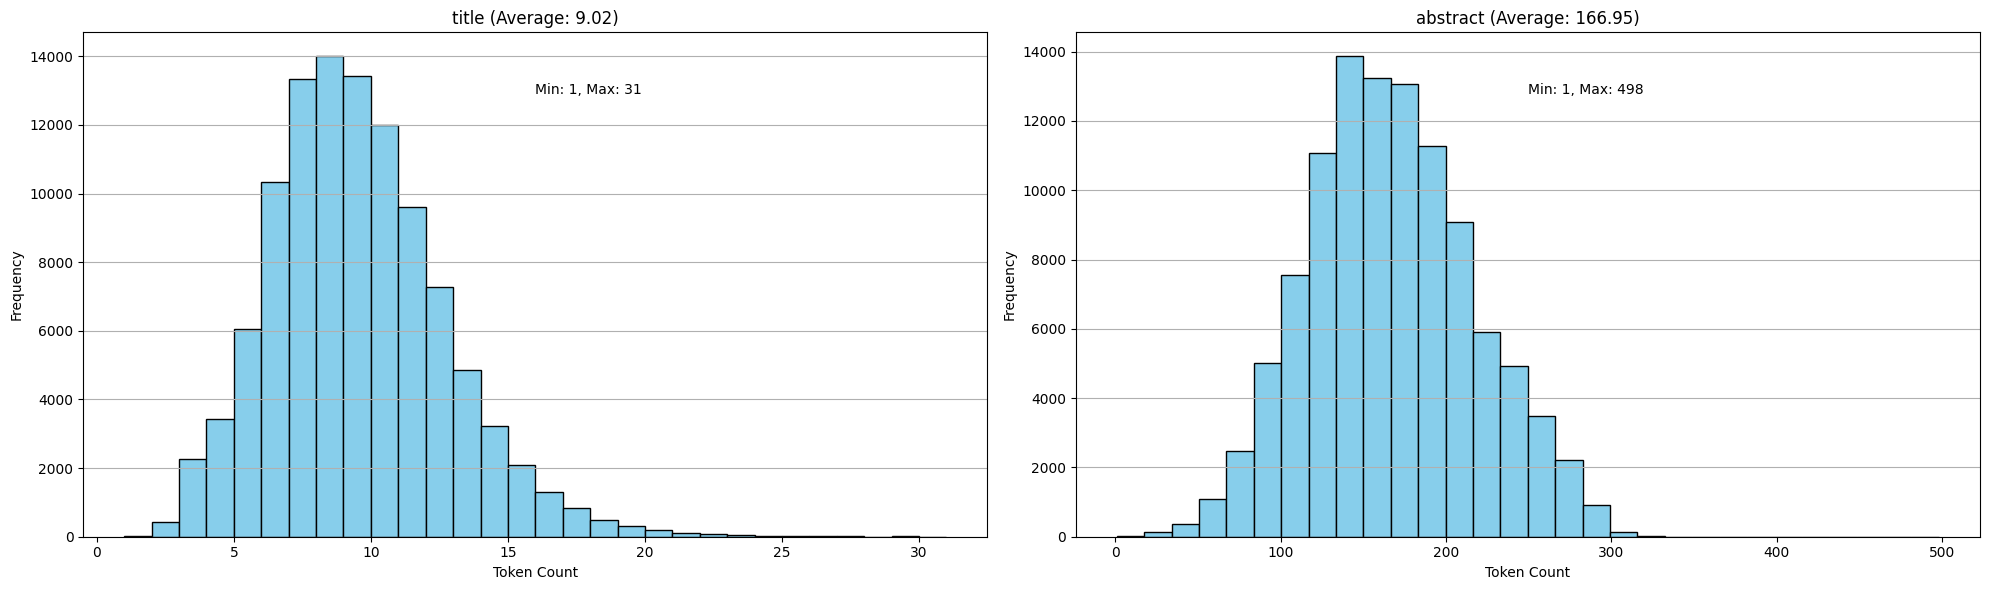

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # 加载 Parquet 文件
# df = pd.read_parquet('./train.parquet')

# # 设置 pandas 的显示选项，使其不进行内容省略
# pd.set_option('display.max_colwidth', None)  # 设置列宽为 None，以完整显示每列的内容

# 获取 DataFrame 的列名
columns = df.columns

# 创建子图布局
num_columns = len(columns)
fig, axes = plt.subplots(1, num_columns, figsize=(10*num_columns, 6))

# 针对每一列绘制柱状图
for i, column in enumerate(columns):
    # 计算每个样本中标记的数量
    token_counts_per_sample = df[column].apply(lambda x: len(str(x).split()))

    # 计算平均 token 数
    mean_token_count = token_counts_per_sample.mean()

    # 绘制柱状图
    axes[i].hist(token_counts_per_sample, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column} (Average: {mean_token_count:.2f})')
    axes[i].set_xlabel('Token Count')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

    # 显示范围
    min_count = token_counts_per_sample.min()
    max_count = token_counts_per_sample.max()
    axes[i].text(0.5, 0.9, f'Min: {min_count}, Max: {max_count}', transform=axes[i].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


In [ ]:
#查看测试集数据分布

import pandas as pd

# 设置 pandas 的显示选项，使其不进行内容省略
pd.set_option('display.max_colwidth', None)  # 设置列宽为 None，以完整显示每列的内容

# 加载 Parquet 文件
df_test = pd.read_parquet('./test.parquet') #测试集

# 查看 DataFrame 的形状
print("DataFrame 的形状：", df_test.shape)

# 仅显示前几行，但每行内容完整显示
display(df_test.head())


DataFrame 的形状： (11760, 2)


,title,abstract
0,Epsilon Consistent Mixup: Structural Regularization with an Adaptive Consistency-Interpolation Tradeoff,"In this paper we propose $\epsilon$-Consistent Mixup ($\epsilon$mu). $\epsilon$mu is a data-based structural regularization technique that combines Mixup's linear interpolation with consistency regularization in the Mixup direction, by compelling a simple adaptive tradeoff between the two. This learnable combination of consistency and interpolation induces a more flexible structure on the evolution of the response across the feature space and is shown to improve semi-supervised classification accuracy on the SVHN and CIFAR10 benchmark datasets, yielding the largest gains in the most challenging low label-availability scenarios. Empirical studies comparing $\epsilon$mu and Mixup are presented and provide insight into the mechanisms behind $\epsilon$mu's effectiveness. In particular, $\epsilon$mu is found to produce more accurate synthetic labels and more confident predictions than Mixup."
1,"Particle Graph Autoencoders and Differentiable, Learned Energy Mover's Distance","Autoencoders have useful applications in high energy physics in anomaly detection, particularly for jets - collimated showers of particles produced in collisions such as those at the CERN Large Hadron Collider. We explore the use of graph-based autoencoders, which operate on jets in their ""particle cloud"" representations and can leverage the interdependencies among the particles within a jet, for such tasks. Additionally, we develop a differentiable approximation to the energy mover's distance via a graph neural network, which may subsequently be used as a reconstruction loss function for autoencoders."
2,Probabilistic DAG Search,"Exciting contemporary machine learning problems have recently been phrased in the classic formalism of tree search -- most famously, the game of Go. Interestingly, the state-space underlying these sequential decision-making problems often posses a more general latent structure than can be captured by a tree. In this work, we develop a probabilistic framework to exploit a search space's latent structure and thereby share information across the search tree. The method is based on a combination of approximate inference in jointly Gaussian models for the explored part of the problem, and an abstraction for the unexplored part that imposes a reduction of complexity ad hoc. We empirically find our algorithm to compare favorably to existing non-probabilistic alternatives in Tic-Tac-Toe and a feature selection application."
3,Automatic Detection and Classification of Tick-borne Skin Lesions using Deep Learning,"Around the globe, ticks are the culprit of transmitting a variety of bacterial, viral and parasitic diseases. The incidence of tick-borne diseases has drastically increased within the last decade, with annual cases of Lyme disease soaring to an estimated 300,000 in the United States alone. As a result, more efforts in improving lesion identification approaches and diagnostics for tick-borne illnesses is critical. The objective for this study is to build upon the approach used by Burlina et al. by using a variety of convolutional neural network models to detect tick-borne skin lesions. We expanded the data inputs by acquiring images from Google in seven different languages to test if this would diversify training data and improve the accuracy of skin lesion detection. The final dataset included nearly 6,080 images and was trained on a combination of architectures (ResNet 34, ResNet 50, VGG 19, and Dense Net 121). We obtained an accuracy of 80.72% with our model trained on the DenseNet 121 architecture."
4,Mixing Real and Synthetic Data to Enhance Neural Network Training -- A Review of Current Approaches,"Deep neural networks have gained tremendous importance in many computer vision tasks. However, their power comes at the cost of large amounts of annotated data required for supervised training. In this work we re

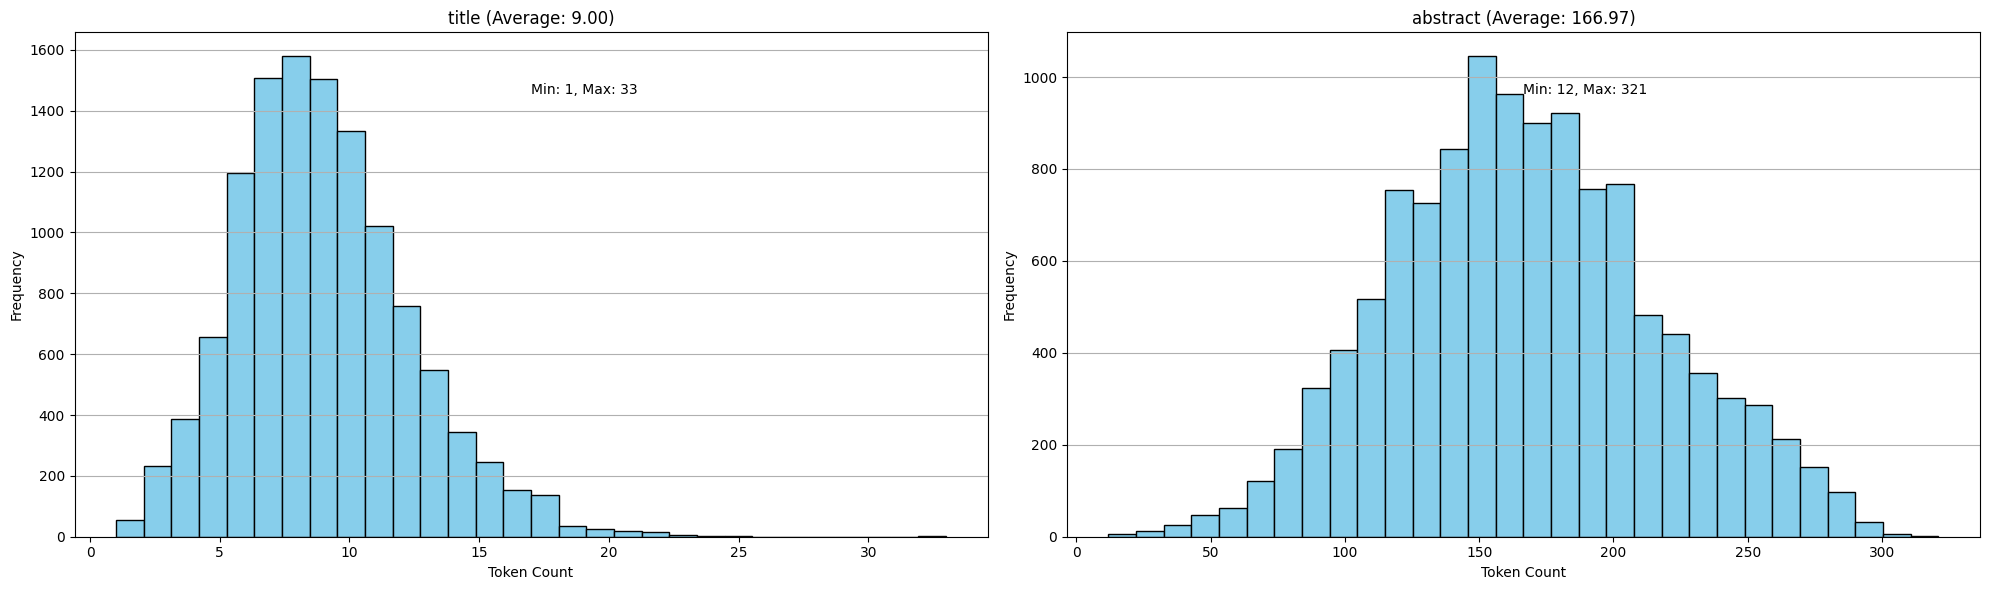

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # 加载 Parquet 文件
# df_test = pd.read_parquet('./test.parquet')

# # 设置 pandas 的显示选项，使其不进行内容省略
# pd.set_option('display.max_colwidth', None)  # 设置列宽为 None，以完整显示每列的内容

# 获取 DataFrame 的列名
columns = df_test.columns

# 创建子图布局
num_columns = len(columns)
fig, axes = plt.subplots(1, num_columns, figsize=(10*num_columns, 6))

# 针对每一列绘制柱状图
for i, column in enumerate(columns):
    # 计算每个样本中标记的数量
    token_counts_per_sample = df_test[column].apply(lambda x: len(str(x).split()))

    # 计算平均 token 数
    mean_token_count = token_counts_per_sample.mean()

    # 绘制柱状图
    axes[i].hist(token_counts_per_sample, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column} (Average: {mean_token_count:.2f})')
    axes[i].set_xlabel('Token Count')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

    # 显示范围
    min_count = token_counts_per_sample.min()
    max_count = token_counts_per_sample.max()
    axes[i].text(0.5, 0.9, f'Min: {min_count}, Max: {max_count}', transform=axes[i].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


- total tokens: train  + test

(105832+11760) * (9+167)=117592 * 176=20696192=20.7M

gpt-3.5-turbo-instruct;	input:$1.50/1M tokens; output: $2.00/1M tokens

input: 21M; output: < 15M

total cost  = 21*1.5 + 15*2 = $61.5 * 7.5 = 460RMB

- prompt to GPT3.5

title: Deep Normed Embeddings for Patient Representation

abstract: We introduce a novel contrastive representation learning objective and a training scheme for clinical time series. Specifically, we project high dimensional E.H.R. data to a closed unit ball of low dimension, encoding geometric priors so that the origin represents an idealized perfect health state and the euclidean norm is associated with the patient's mortality risk. Moreover, using septic patients as an example, we show how we could learn to associate the angle between two vectors with the different organ system failures, thereby, learning a compact representation which is indicative of both mortality risk and specific organ failure. We show how the learned embedding can be used for online patient monitoring, supplement clinicians and improve performance of downstream machine learning tasks. This work was partially motivated from the desire and the need to introduce a systematic way of defining intermediate rewards for Reinforcement Learning in critical care medicine. Hence, we also show how such a design in terms of the learned embedding can result in qualitatively different policies and value distributions, as compared with using only terminal rewards.

Given the above content, ask an AI-related question based on the title and generate an answer based on the abstract in JSON format {"question": What/How is xxx ?",  "answer": "xxx. (Reference": title)." Give the question with less than 25 tokens and the answer with 100 to 200 tokens.

- generated result, Q&A

{"question": "How are deep normed embeddings utilized for patient representation?", "answer": "Deep normed embeddings are used to encode clinical time series data into a low-dimensional space, where the origin signifies perfect health and the norm indicates mortality risk. By learning associations between vector angles and organ failures, the embedding captures both mortality risk and specific organ dysfunction. This representation aids in online patient monitoring, enhances clinician support, and improves downstream machine learning tasks. (Reference: Deep Normed Embeddings for Patient Representation)." }


- A training sample:

{
  
"question": "How are deep normed embeddings utilized for patient representation?",

"context": "title + abstract"

"answer": "Deep normed embeddings are used to encode clinical time series data into a low-dimensional space, where the origin signifies perfect health and the norm indicates mortality risk. By learning associations between vector angles and organ failures, the embedding captures both mortality risk and specific organ dysfunction. This representation aids in online patient monitoring, enhances clinician support, and improves downstream machine learning tasks. (Reference: Deep Normed Embeddings for Patient Representation)."

}



- exclude the samples of lower quality for this task

- RAG

vector base: chunks of (title + abstract)

retrival: match input question with chunks